# Анализ train.csv

## Загрузка и проверка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_data = pd.read_csv("./train.csv")

Покажем полезную оценочную информацию по загруженному набору данных:

In [2]:
train_data.sample(n=5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3527,35,21.10,741,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
5199,1,19.70,19.7,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4265,22,89.10,1949.4,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0
1119,39,59.85,2341.5,Female,0,Yes,Yes,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,0
454,60,59.85,3483.45,Female,0,Yes,No,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),0


In [3]:
train_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

У TotalSpent подозрительный тип данных, на первый взгляд (по выборке из 5 строчек) везде должен быть float64. Определим где именно возникли проблемы: 

In [5]:
def not_a_number(potential_float):
    try:
        float(potential_float)
        return False
    except ValueError:
        return True


train_data[train_data["TotalSpent"].apply(not_a_number)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Для этих строчек поставим TotalSpent=0, а затем проебразуем весь столбец в тип float64:

In [6]:
train_data["TotalSpent"] = train_data.TotalSpent.replace(
    r"^\s*$", "0.0", regex=True
).astype("float64")

Далее для удобства сохраним различные группы признаков в отдельные списки:


In [7]:
# Числовые признаки
num_cols = ["ClientPeriod", "MonthlySpending", "TotalSpent"]

# Категориальные признаки
cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

feature_cols = num_cols + cat_cols
target_col = "Churn"

Из любопытства найдем, сколько уникальных элементов содержит каждый стоблец train_data, а также что это за элементы:

In [8]:
cols_info = {}
cols_uniq_len = []
for v in feature_cols + [target_col]:
    uniq_elems = train_data[v].unique()
    cols_info[v] = uniq_elems
    cols_uniq_len.append(len(uniq_elems))

Используя всю имеющуюся информацию проверим train_data на предмет соответствия здравому смыслу. 
Числовые признаки должны иметь адекватные минимальные и максимальные значения. Элементов категориальных признаков мало, их можно проверить "на глаз":

In [9]:
for i, v in enumerate(num_cols):
    args = map(str, [v, cols_uniq_len[i], cols_info[v].min(), cols_info[v].max()])
    print("{:<30s} uniq count: {:^10s} min: {:^10s} max: {:^10s}".format(*args))
for i, v in enumerate(cat_cols + [target_col]):
    args = map(str, [v, cols_uniq_len[3 + i], ", ".join(map(str, cols_info[v]))])
    print("{:<30s} uniq count: {:^10s} elems: {:<50s}".format(*args))

ClientPeriod                   uniq count:     73     min:     0      max:     72    
MonthlySpending                uniq count:    1468    min:   18.25    max:   118.75  
TotalSpent                     uniq count:    4978    min:    0.0     max:   8684.8  
Sex                            uniq count:     2      elems: Male, Female                                      
IsSeniorCitizen                uniq count:     2      elems: 0, 1                                              
HasPartner                     uniq count:     2      elems: Yes, No                                           
HasChild                       uniq count:     2      elems: Yes, No                                           
HasPhoneService                uniq count:     2      elems: Yes, No                                           
HasMultiplePhoneNumbers        uniq count:     3      elems: No, Yes, No phone service                         
HasInternetService             uniq count:     3      elems: No, Fiber

Выглядит нормально, можно двигаться дальше.

## Визуализация

Посмотрим на распределение значений числовых признаков посредством гистограмм.
Каждый столбец показывает, сколько раз в train_data встречались величины из соответствующего интервала. В то же время столбцы окрашены разными цветами в отношении, равном отношению кол-ва строк с Churn=1 к кол-ву строк с Churn=0 данного отрезка.

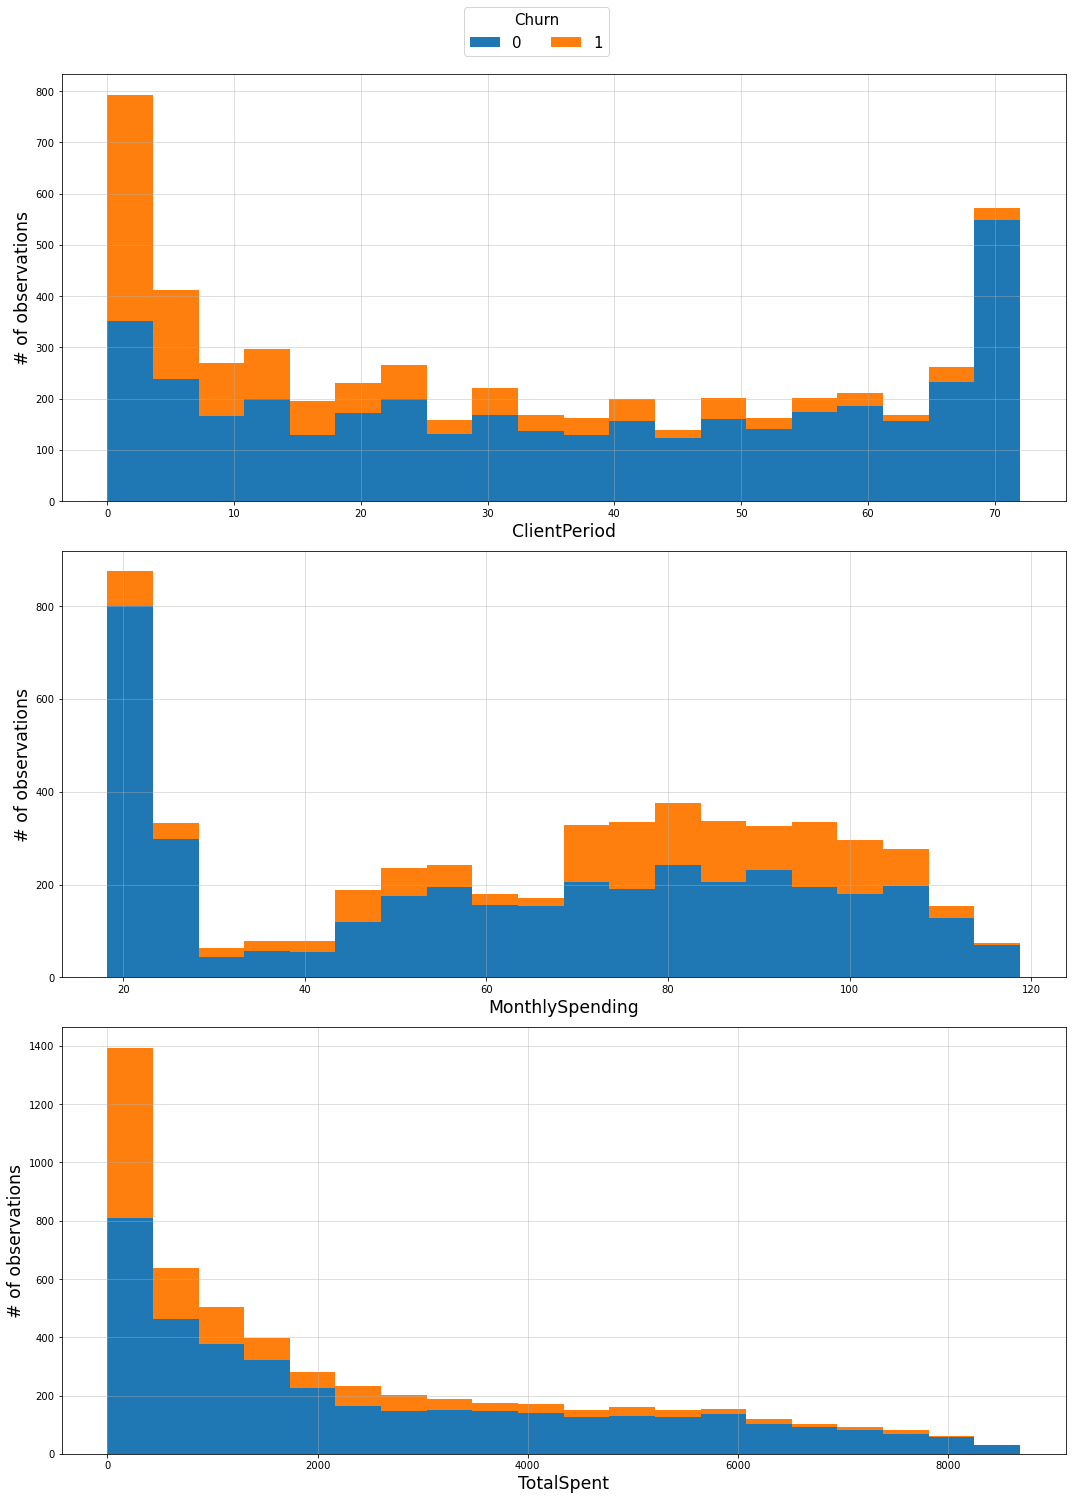

In [10]:
plt.rcParams.update({"axes.titlesize": "xx-large", "axes.labelsize": "xx-large"})
fig, ax = plt.subplots(3, 1, figsize=(15, 20))
targ0 = train_data.groupby(target_col).get_group(0)
targ1 = train_data.groupby(target_col).get_group(1)
for i, v in enumerate(num_cols):
    ax[i].hist([targ0[v], targ1[v]], bins=20, stacked=True)
    ax[i].set_xlabel(v)
    ax[i].set_ylabel("# of observations")
    ax[i].grid(alpha=0.5)
fig.legend(
    ["0", "1"],
    bbox_to_anchor=[0.5, 1],
    loc="lower center",
    ncol=2,
    title="Churn",
    fontsize=15,
    title_fontsize=15,
)
plt.tight_layout()

Переключимся на категориальные признаки. Для каждого из них нарисуем двуслойную круговую диаграмму. Внешний слой делится в отношении числа объектов с Churn=0 к числу объектов с Churn=1 на всём train_data. Внутренний слой демонстрирует количественные отношения между элементами выбранного категориального признака (помня о разбиении внешнего слоя). 

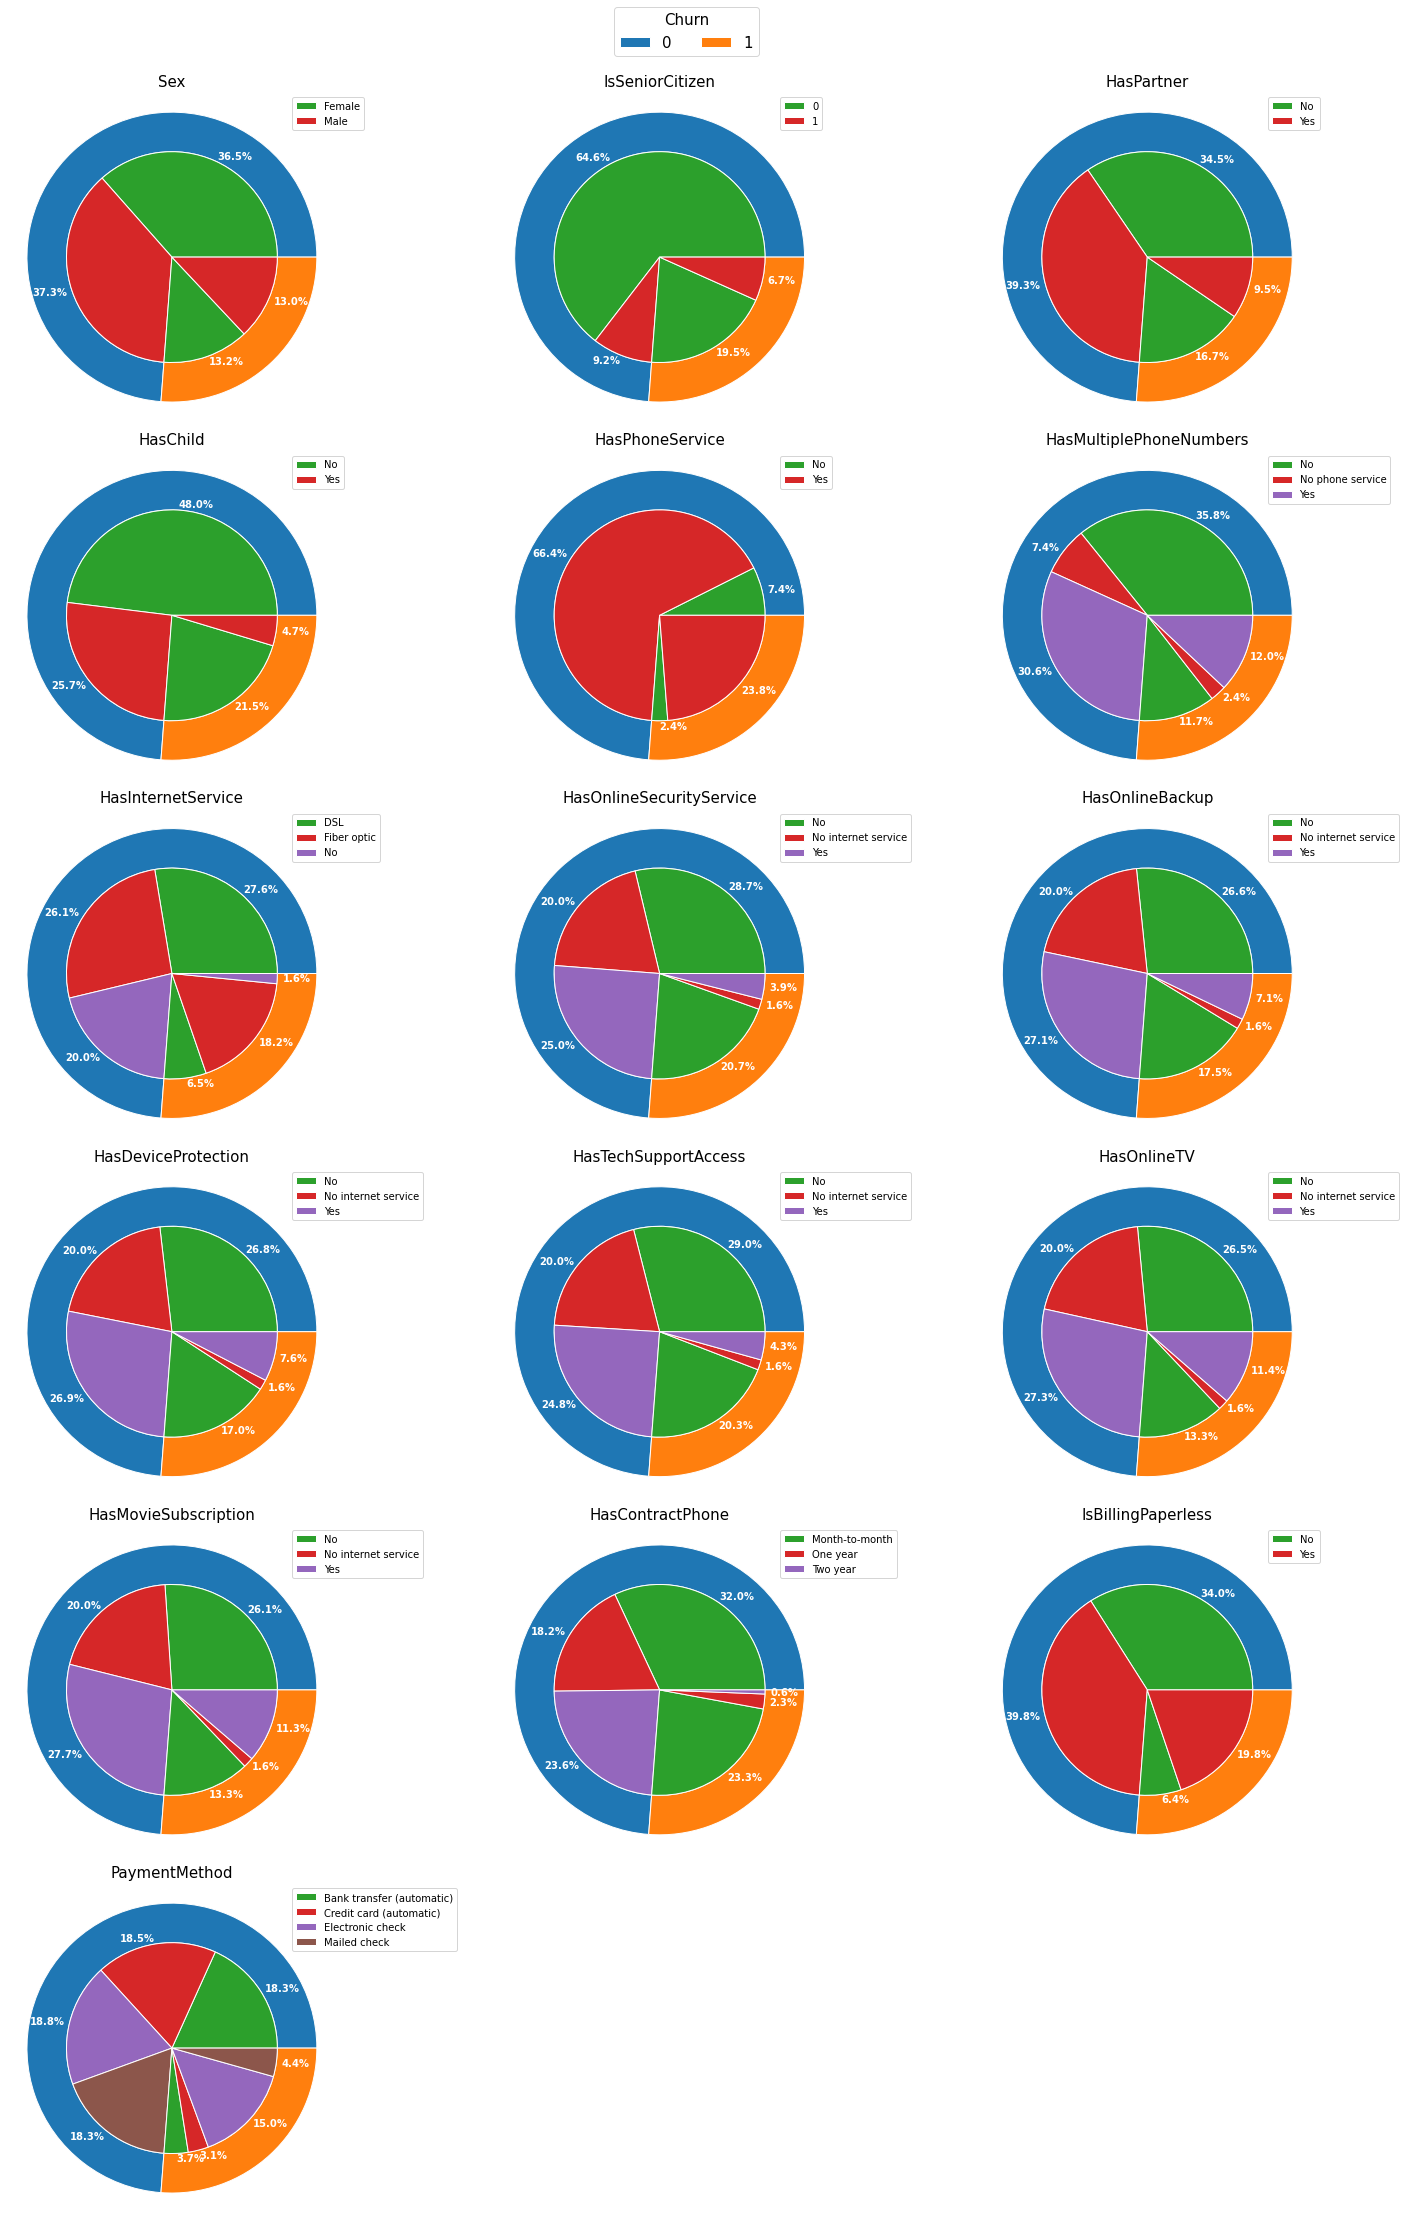

In [11]:
fig, ax = plt.subplots(int(len(cat_cols) / 3) + 1, 3, figsize=(20, 30))
[axi.set_axis_off() for axi in ax.ravel()]
cmap = plt.get_cmap("tab20")
for i, v in enumerate(cat_cols):
    lax = ax[int(i / 3), i % 3]
    grp_dat = train_data[[target_col, v]].value_counts(sort=False)
    legend = grp_dat.index.get_level_values(1)[: cols_uniq_len[3 + i]]
    vals = np.array([grp_dat[0], grp_dat[1]])
    fvals = vals.flatten()
    colors = [cmap([0, 2]), cmap(2 * list(range(4, 4 + 2 * len(legend), 2)))]
    lax.pie(
        vals.sum(axis=1),
        radius=1.1,
        colors=colors[0],
        wedgeprops=dict(width=0.3, edgecolor="w"),
    )
    labels = ["{:.1f}%".format(v / np.sum(fvals) * 100) for v in fvals]
    wedges, texts = lax.pie(
        vals.flatten(),
        labels=labels,
        labeldistance=1.05,
        textprops=dict(color="w", weight="bold"),
        radius=0.8,
        colors=colors[1],
        wedgeprops=dict(width=0.8, edgecolor="w"),
    )
    lax.set_title(v, fontdict=dict(fontsize=15))
    lax.set_aspect("equal")
    lax.legend(
        wedges[: cols_uniq_len[3 + i]],
        legend,
        loc="upper left",
        bbox_to_anchor=(0.85, 0, 0.5, 1),
    )
fig.legend(
    ["0", "1"],
    bbox_to_anchor=[0.5, 1],
    loc="lower center",
    ncol=2,
    title=target_col,
    fontsize=15,
    title_fontsize=15,
)
plt.tight_layout()

Т.к. поставлена задача бинарной классификации, и распределение целовой переменной примерно соответствует отношению 3:1, то классы можно считать умеренно сбалансированными. 
(Считаем что 1:1 - идеальная сбалансированность, а 9:1 - сильная несбалансированность)

Рисовать что-то еще смысла нет, поэтому перейдем к обучению.

# Применение линейных моделей

Пропустим числовые признаки через StandardScaler, категориальные преобразуем при помощи OneHotEncoder (попутно выбросив некоторые части, чтобы избавиться от линейных зависимостей).
Затем отправим всё это в GridSearchCV, которая определит, какой из предложенных в parameters гиперпараметров $C$ логистической регрессии (отвечающий за $\ell_2$ регуляризацию) дает лучшее качество.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

drop = np.array(
    [
        "Female",
        0,
        "No",
        "No",
        "No",
        "No phone service",
        "No",
        "No internet service",
        "No internet service",
        "No internet service",
        "No internet service",
        "No internet service",
        "No internet service",
        "One year",
        "No",
        "Mailed check",
    ],
    dtype="object",
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop=drop), cat_cols),
    ]
)
pipl = Pipeline(
    steps=[("preprocessor", preprocessor), ("logisticregression", LogisticRegression())]
)
parameters = {"logisticregression__C": np.arange(0, 100, 1)}
cv = GridSearchCV(pipl, param_grid=parameters, scoring="roc_auc", cv=3, n_jobs=-1)
cv.fit(train_data[feature_cols], train_data[target_col])
best_logreg = cv.best_estimator_
print(
    "The best hyperparameter is С = ",
    cv.best_params_["logisticregression__C"],
    " with score ",
    cv.best_score_,
)

The best hyperparameter is С =  22  with score  0.8432066296090683


В дальнейшем будут проверяться другие модели, и хотелось бы поставить всех в равные условия перед тем как сравнивать (т.е. чтоб у них были одинаковые данные на входе). Для этого разделим train_data на тестовую и обучающую выборки:

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_data[feature_cols], train_data[target_col], test_size=0.3, random_state=42
)

Обучим best_logreg, предскажем вероятности тестовой части и вычислим площадь под ROC кривой (всё понадобится позже для графиков):

In [14]:
from sklearn.metrics import roc_auc_score

best_logreg.fit(X_train, y_train)
y_pred_prob_logreg = best_logreg.predict_proba(X_test)[:, 1]
roc_auc_logreg = round(roc_auc_score(y_test, y_pred_prob_logreg), 5)

А вот как выглядит матрица ошибок:

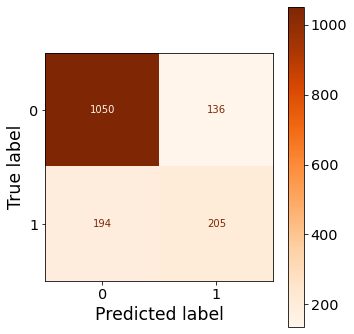

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plt.rcParams.update({"xtick.labelsize": "x-large", "ytick.labelsize": "x-large"})
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(best_logreg, X_test, y_test, ax=ax, cmap=plt.cm.Oranges)
plt.tight_layout()

Также интересно посмотреть на веса признаков:

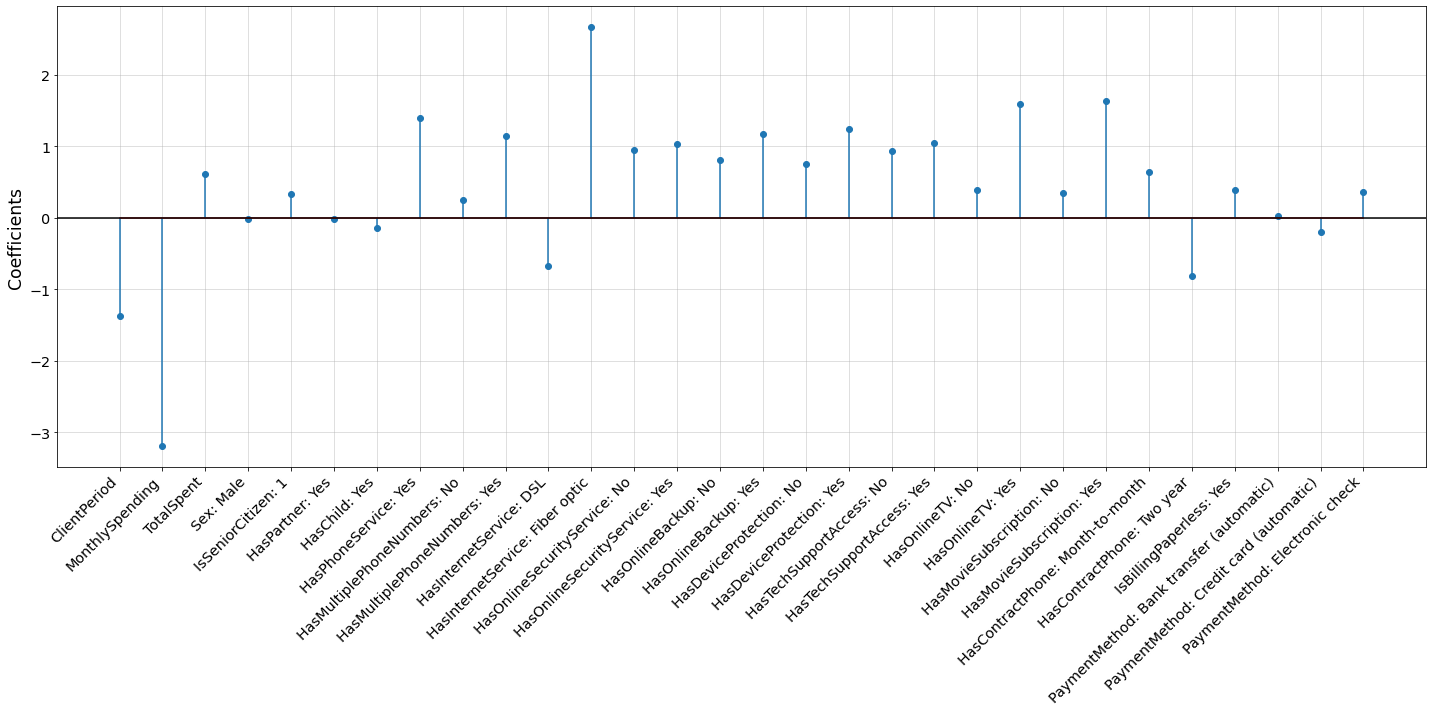

In [16]:
onehot_names = (
    best_logreg.named_steps["preprocessor"].transformers_[1][1].get_feature_names()
)
coefs = best_logreg.named_steps["logisticregression"].coef_[0]
names = num_cols[:]
for w in onehot_names:
    index = int(w.split("_")[0].split("x")[1])
    names.append(cat_cols[index] + ": " + w.split("_")[1])
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.stem(range(len(names)), coefs)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=45, horizontalalignment="right")
ax.axhline(0, color="black")
ax.set_ylabel("Coefficients")
ax.grid(alpha=0.5)
plt.tight_layout()

# Градиентный бустинг над деревьями

Сначала попробуем градиентный бустинг с настройками почти по умолчанию:

In [17]:
from catboost import CatBoostClassifier

catb_args = dict(cat_features=cat_cols, eval_metric="AUC", task_type="GPU", silent=True)
def_catb = CatBoostClassifier(**catb_args)
def_catb.fit(X_train, y_train)
y_pred_prob_def_catb = def_catb.predict_proba(X_test)[:, 1]
roc_auc_def_catb = round(roc_auc_score(y_test, y_pred_prob_def_catb), 5)

Затем попытаемся найти гиперпараметры получше:

In [18]:
model = CatBoostClassifier(**catb_args)
grid = {
    "learning_rate": np.arange(0.01, 0.1, 0.01),
    "iterations": [130, 230, 350, 500, 1000],
}
grid_search_result = model.grid_search(
    grid, X=train_data[feature_cols], y=train_data[target_col], cv=3
)

bestTest = 0.854744643
bestIteration = 129
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8547446	best: 0.8547446 (0)	total: 1.92s	remaining: 1m 24s
bestTest = 0.8669728637
bestIteration = 129
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8669729	best: 0.8669729 (1)	total: 4.16s	remaining: 1m 29s
bestTest = 0.8690697849
bestIteration = 129
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8690698	best: 0.8690698 (2)	total: 6.61s	remaining: 1m 32s
bestTest = 0.8706651926
bestIteration = 129
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8706652	best: 0.8706652 (3)	total: 9s	remaining: 1m 32s
bestTest = 0

In [19]:
print("Best parameters: ", grid_search_result["params"])

Best parameters:  {'iterations': 130, 'learning_rate': 0.08}


На основе результатов grid_search_result сделаем новый CatBoostClassifier:

In [20]:
cust_catb_args = {**catb_args, **grid_search_result["params"]}
cust_catb = CatBoostClassifier(**cust_catb_args)
cust_catb.fit(X_train, y_train)
y_pred_prob_cust_catb = cust_catb.predict_proba(X_test)[:, 1]
roc_auc_cust_catb = round(roc_auc_score(y_test, y_pred_prob_cust_catb), 5)

Для cust_catb нарисуем матрицу ошибок и значимость признаков:

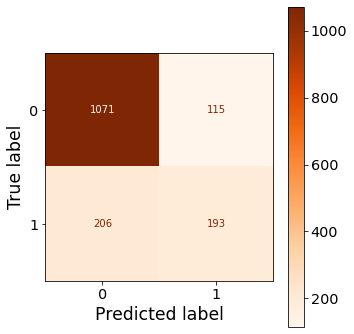

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(cust_catb, X_test, y_test, ax=ax, cmap=plt.cm.Oranges)
plt.tight_layout()

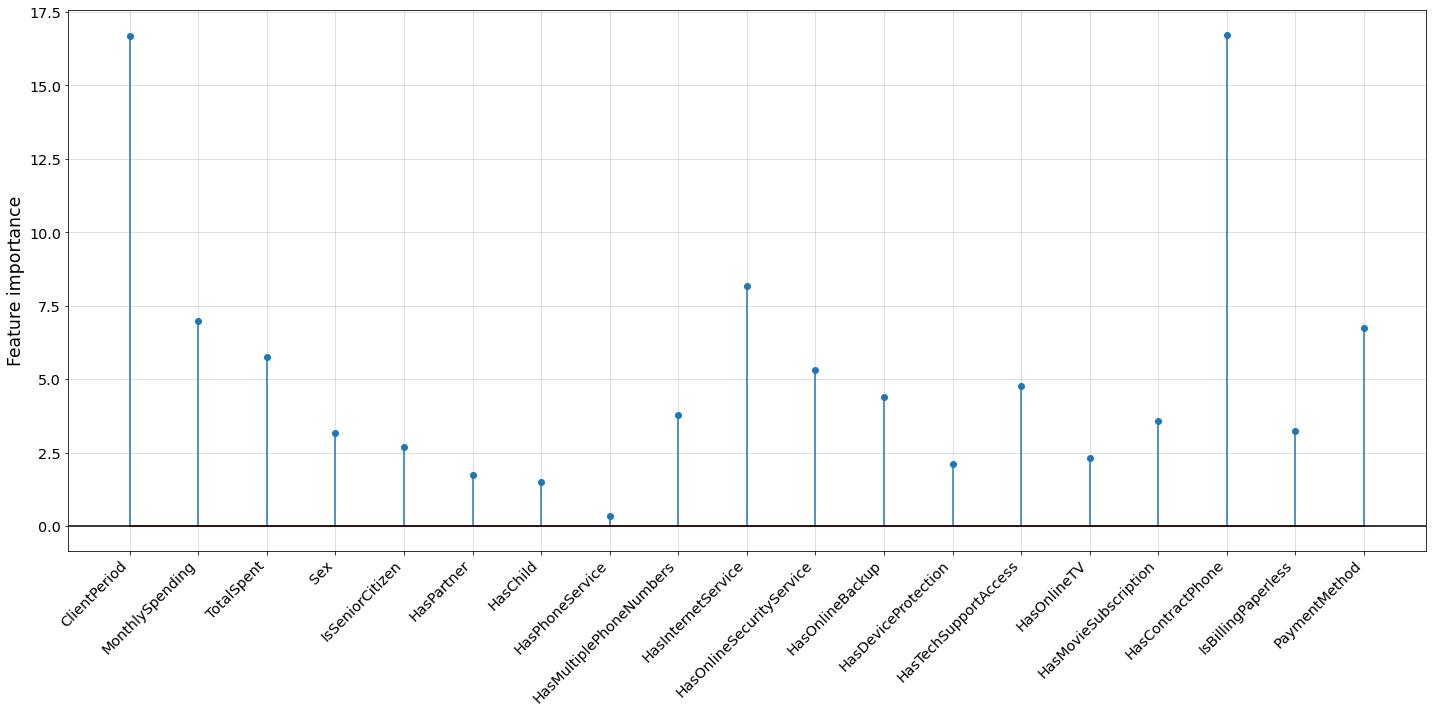

In [22]:
importance = cust_catb.feature_importances_
names = cust_catb.feature_names_
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.stem(range(len(names)), importance)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=45, horizontalalignment="right")
ax.axhline(0, color="black")
ax.set_ylabel("Feature importance")
ax.grid(alpha=0.5)
plt.tight_layout()

Теперь построим ROC кривые для всех испробованных алгоритмов:

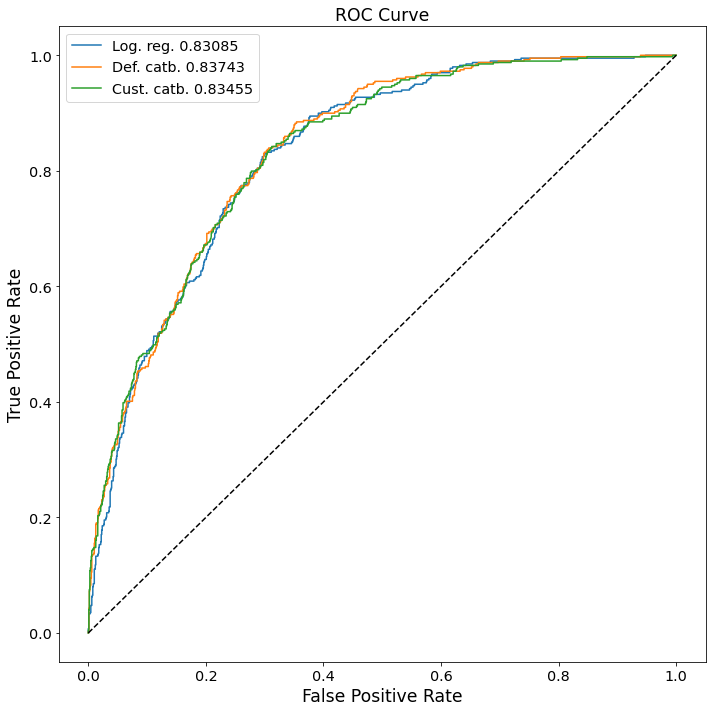

In [23]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thr1 = roc_curve(y_test, y_pred_prob_logreg)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_prob_def_catb)
fpr3, tpr3, thr3 = roc_curve(y_test, y_pred_prob_cust_catb)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(fpr1, tpr1)
ax.plot(fpr2, tpr2)
ax.plot(fpr3, tpr3)
ax.plot([0, 1], [0, 1], "k--")
plt.legend(
    (
        "Log. reg. " + str(roc_auc_logreg),
        "Def. catb. " + str(roc_auc_def_catb),
        "Cust. catb. " + str(roc_auc_cust_catb),
    ),
    fontsize="x-large",
)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.tight_layout()

Т.е. на данной тестовой выборке успешнее всего работает градиентный бустинг с настройками по умолчанию. Но все же лучшей с точки зрения обобщений, как мне кажется, будет cust_catb. 

# Предсказания и Kaggle

Для test.csv повторим все шаги, что были проделаны с train_data:

In [24]:
subm_predict_data = pd.read_csv("./test.csv")
submission = pd.read_csv("./submission.csv")
subm_predict_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [25]:
subm_predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [26]:
subm_predict_data[subm_predict_data['TotalSpent'].apply(not_a_number)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [27]:
subm_predict_data["TotalSpent"] = subm_predict_data.TotalSpent.replace(
    r"^\s*$", "0.0", regex=True
).astype("float64")

Обучим cust_catb на train_data, предскажем вероятности для subm_predict_data:

In [28]:
cust_catb.fit(train_data[feature_cols], train_data[target_col])
submission["Churn"] = cust_catb.predict_proba(subm_predict_data)[:, 1]
submission.to_csv("./my_subm_catb.csv", index=False)

На Kaggle roc_auc_score на my_subm_catb из конкретно этого отчета составил 0.85108.
Не самый успешный (если учитывать проделанные ранее черновые попытки), но тоже довольно хороший результат.